<a href="https://colab.research.google.com/github/Pravallika-02-datascience/Internship/blob/main/Mainflowintern.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 1 **

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#step 1 : load the data set
student=pd.read_csv("/content/student-mat.csv")

In [ ]:
#load the data into a dataframe
student=pd.read_csv("/content/student-mat.csv",sep=";")
print("DATA LOADED SUCCESSFULLY ")

DATA LOADED SUCCESSFULLY 


In [ ]:
#Data Exploration
print(student.head())
print(student.info())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (to

In [ ]:
#step 3
 #data cleaning
print(student.isnull().sum())

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


In [ ]:
#remove duplicates
student=(student.drop_duplicates())

In [ ]:
#Step  4
#data analysis

#average score in math?
avg_score=student['G3'].mean()
print("Average score in maths :",avg_score)
#students who score above 15 in the final grade
stu_above_15=len(student[student['G3']>15])
print("Students who scored above 15 : ",stu_above_15)
#corelation between study time and final grade
correlation=student['studytime'].corr(student['G3'])
print("correlation between study and grade ",correlation)
#which gender has highest avg final grade
gender=student.groupby('sex')['G3'].mean()
print("gender has highest avg final grade ",gender)


Average score in maths : 10.415189873417722
Students who scored above 15 :  40
correlation between study and grade  0.09781968965319626
gender has highest avg final grade  sex
F     9.966346
M    10.914439
Name: G3, dtype: float64


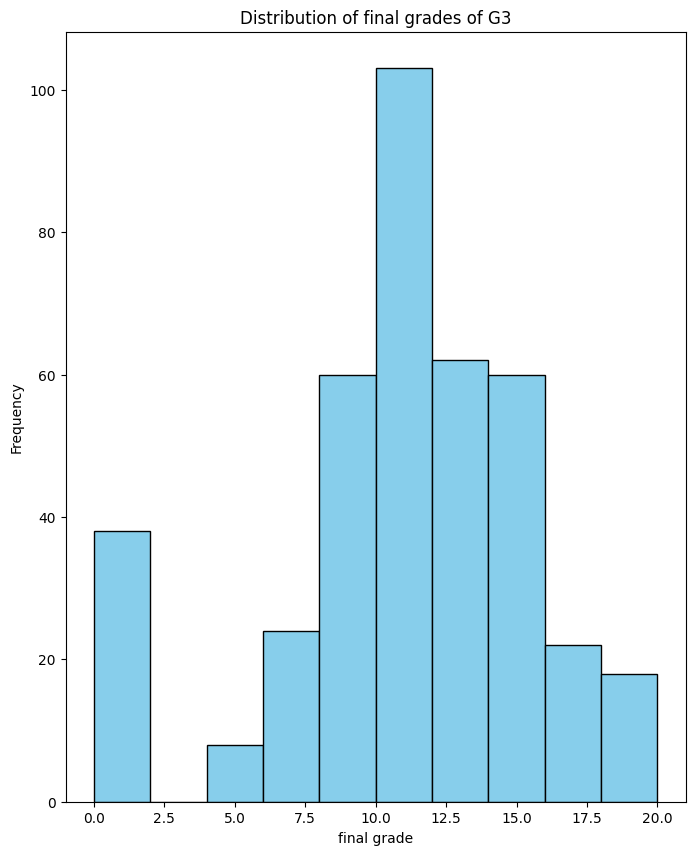

In [ ]:
#step  5
#data visualization
#histogram of final grades
plt.figure(figsize=(8,10))
plt.hist(student['G3'],bins=10,color='skyblue',edgecolor='black')
plt.title("Distribution of final grades of G3")
plt.xlabel('final grade')
plt.ylabel('Frequency')
plt.show()

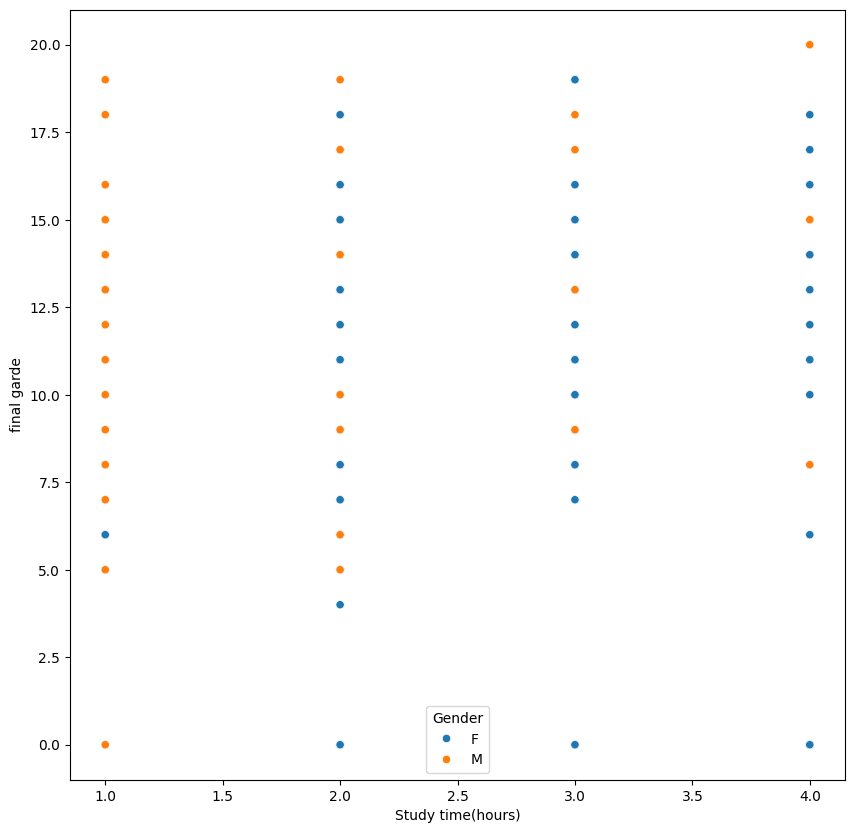

In [ ]:
#scatterplot of study time vs final gade
plt.figure(figsize=(10,10))
sns.scatterplot(data=student,x='studytime',y='G3',hue='sex')
plt.title=("study time vs final grade")
plt.xlabel("Study time(hours)")
plt.ylabel("final garde")
plt.legend(title='Gender')
plt.show()

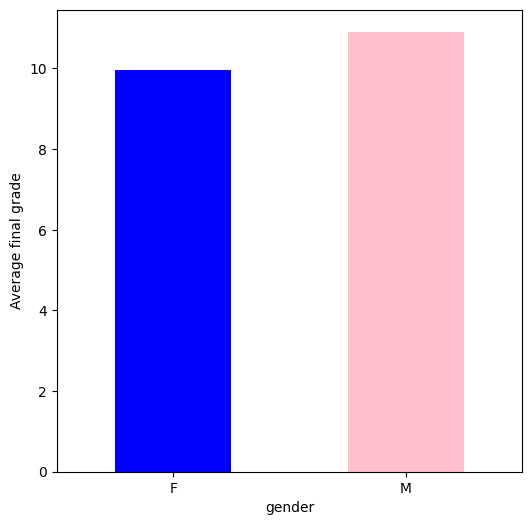

In [ ]:
#Bar chart of average scores by gender
plt.figure(figsize=(6,6))
gender.plot(kind='bar',color=['blue','pink'])
plt.title=("Average final garde by gender")
plt.ylabel("Average final grade")
plt.xlabel("gender")
plt.xticks(rotation=1)
plt.show()

# TASK 2

# **Synthetic dataset for task 2 **


In [4]:
!pip install faker

import pandas as pd
import random
from faker import Faker
import numpy as np

fake = Faker()

# Define sample data for each field
regions = ["North America", "Europe", "Asia", "South America", "Africa", "Oceania"]
countries_by_region = {
    "North America": ["USA", "Canada", "Mexico"],
    "Europe": ["Germany", "France", "UK", "Spain"],
    "Asia": ["India", "China", "Japan", "Singapore"],
    "South America": ["Brazil", "Argentina", "Chile"],
    "Africa": ["South Africa", "Nigeria", "Egypt"],
    "Oceania": ["Australia", "New Zealand"]
}

product_categories = {
    "Furniture": ["Chairs", "Tables", "Bookcases", "Furnishings"],
    "Office Supplies": ["Binders", "Paper", "Art", "Labels"],
    "Technology": ["Phones", "Accessories", "Copiers", "Machines"]
}

product_names = {
    "Chairs": ["Ergonomic Office Chair", "Executive Leather Chair"],
    "Tables": ["Conference Table", "Adjustable Desk"],
    "Bookcases": ["Wooden Bookcase", "Metal Shelf"],
    "Furnishings": ["Desk Lamp", "Wall Clock"],
    "Binders": ["Avery Ring Binder", "Staples Binder"],
    "Paper": ["Multipurpose Paper", "Notebook Pack"],
    "Art": ["Color Markers", "Paint Brush Set"],
    "Labels": ["Sticky Labels", "Address Labels"],
    "Phones": ["iPhone 14", "Samsung Galaxy S23"],
    "Accessories": ["Wireless Mouse", "USB-C Hub"],
    "Copiers": ["HP Copier", "Canon Office Copier"],
    "Machines": ["3D Printer", "Fax Machine"]
}

# Generate dataset
num_rows = 1000
data = []

for _ in range(num_rows):
    order_id = f"{fake.country_code()}-{fake.year()}-{random.randint(10000, 99999)}"
    order_date = fake.date_between(start_date='-2y', end_date='today')
    region = random.choice(regions)
    country = random.choice(countries_by_region[region])
    category = random.choice(list(product_categories.keys()))
    sub_category = random.choice(product_categories[category])
    product = random.choice(product_names[sub_category])
    sales = round(random.uniform(10, 5000), 2)
    profit = round(sales * random.uniform(-0.2, 0.3), 2)
    quantity = random.randint(1, 10)
    discount = round(random.choice([0, 0.1, 0.2, 0.3]), 2)

    data.append([
        order_id, order_date, region, country,
        category, sub_category, product, sales,
        profit, quantity, discount
    ])

# Create DataFrame and save
columns = ["Order ID", "Order Date", "Region", "Country", "Product Category",
           "Sub-Category", "Product Name", "Sales", "Profit", "Quantity", "Discount"]

df = pd.DataFrame(data, columns=columns)
df.to_csv("Synthetic_Global_Superstore.csv", index=False)

print("✅ CSV file 'Synthetic_Global_Superstore.csv' has been created.")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 20.7 MB/s eta 0:00:00
✅ CSV file 'Synthetic_Global_Superstore.csv' has been created.


EXPLORATORY DATA ANALYSIS(EDA)

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
P=pd.read_csv('Synthetic_Global_Superstore.csv')

In [7]:
#Display first few rows
display(P.head())

,Order ID,Order Date,Region,Country,Product Category,Sub-Category,Product Name,Sales,Profit,Quantity,Discount
0,GE-2012-79370,2023-12-08,Asia,China,Office Supplies,Labels,Address Labels,582.46,-5.17,5,0.0
1,TW-1978-91608,2024-12-04,Europe,Germany,Furniture,Chairs,Ergonomic Office Chair,1760.02,365.29,8,0.1
2,GH-1985-85888,2024-12-29,Europe,France,Furniture,Chairs,Executive Leather Chair,1128.25,-120.02,8,0.2
3,LV-1980-49084,2024-11-19,Africa,Nigeria,Furniture,Furnishings,Wall Clock,2131.47,-205.24,2,0.3
4,PA-2013-18717,2023-08-17,Europe,UK,Technology,Copiers,HP Copier,1621.20,332.65,8,0.3


In [8]:
#Bsic information
P.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order ID          1000 non-null   object 
 1   Order Date        1000 non-null   object 
 2   Region            1000 non-null   object 
 3   Country           1000 non-null   object 
 4   Product Category  1000 non-null   object 
 5   Sub-Category      1000 non-null   object 
 6   Product Name      1000 non-null   object 
 7   Sales             1000 non-null   float64
 8   Profit            1000 non-null   float64
 9   Quantity          1000 non-null   int64  
 10  Discount          1000 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 86.1+ KB


In [9]:
#Statistical summary
display(P.describe())

,Sales,Profit,Quantity,Discount
count,1000.00000,1000.000000,1000.000000,1000.00000
mean,2283.02966,125.011410,5.655000,0.15180
std,1436.32023,400.098516,2.860797,0.11476
min,10.23000,-960.950000,1.000000,0.00000
25%,1015.59250,-100.080000,3.000000,0.00000
50%,2160.69000,58.215000,6.000000,0.20000
75%,3500.27750,330.290000,8.000000,0.30000
max,4993.54000,1379.870000,10.000000,0.30000


In [10]:
#check for duplicates
duplicates=P.duplicated().sum()

print(duplicates)

0


In [11]:
#handling missing values
print(P.isnull().sum())

Order ID            0
Order Date          0
Region              0
Country             0
Product Category    0
Sub-Category        0
Product Name        0
Sales               0
Profit              0
Quantity            0
Discount            0
dtype: int64


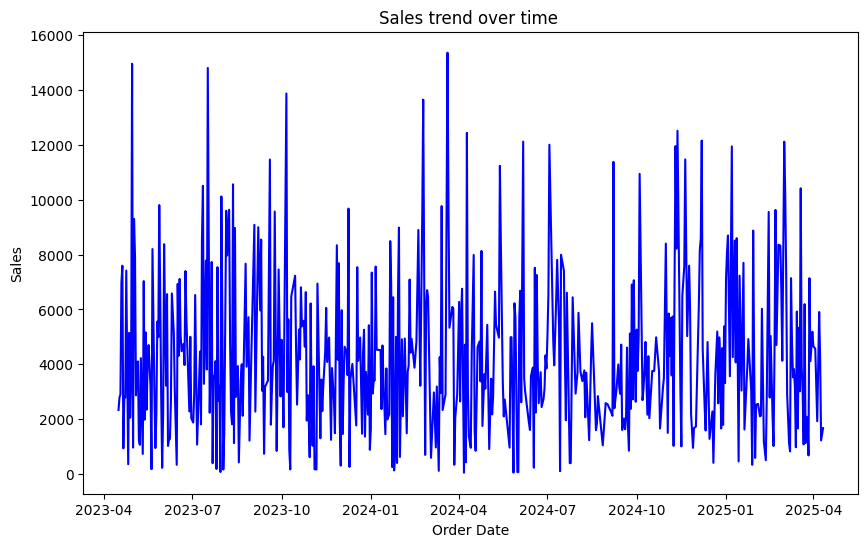

In [12]:
#plot sales trend over quality
plt.figure(figsize=(10,6))
df.groupby('Order Date')['Sales'].sum().plot(kind='line',color='blue')
plt.title('Sales trend over time ')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.show()

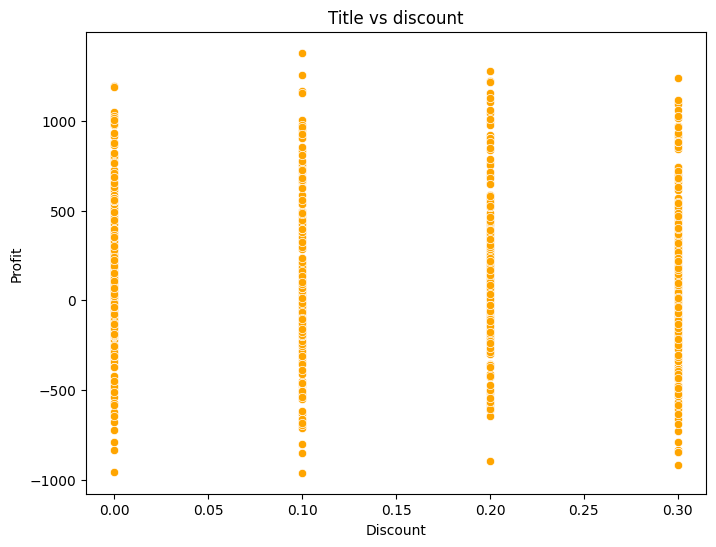

In [14]:
#Scatter plot: profit vs discount
plt.figure(figsize=(8,6))
sns.scatterplot(x='Discount',y='Profit',data=P,color='orange')
plt.title('Title vs discount')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.show()

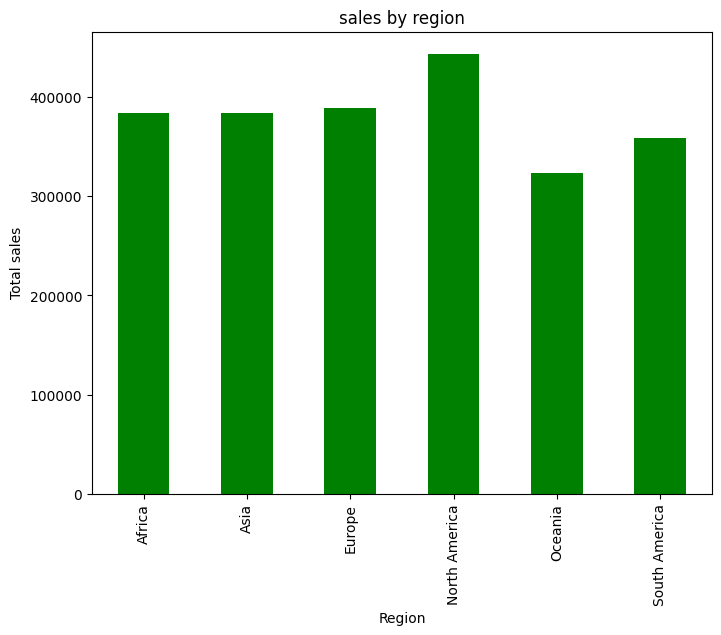

In [16]:
#sales distribution by region
plt.figure(figsize=(8,6))
region_sales=P.groupby('Region')['Sales'].sum()
region_sales.plot(kind='bar',color='green')
plt.title('sales by region')
plt.ylabel('Total sales')
plt.show()

In [17]:
#heatmap for correlations
plt.figure(figsize=(8,6))
sns.heatmap(P.corr(),annot=True,cmap='coolwarm')
plt.title('Correaltion matrix')
plt.show()

ValueError: could not convert string to float: 'GE-2012-79370'

<Figure size 800x600 with 0 Axes>

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [19]:
#select features and target
X=P[['Profit','Discount']]
y=P['Sales']

In [20]:
#split the dataset into training and test sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [21]:
#train the linear regression model
model=LinearRegression()
model.fit(X_train,y_train)


LinearRegression()

In [22]:
#make predictions
y_pred=model.predict(X_test)

In [23]:
#evaluate the model
print(f"Mean squared Error:{mean_squared_error(y_test,y_pred):.2f}")
print(f"R-Square score:{r2_score(y_test,y_pred):.2f}")

Mean squared Error:1994372.31
R-Square score:0.03
